In [11]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pycountry
import matplotlib.patches as mpatches
import matplotlib.colors
import dataframe_image as dfi
%matplotlib inline



In [12]:
world = geopandas.read_file('./data/geojson/europe.geojson')

df = pd.read_csv("./data/datasets/hdi_data.csv")

df

,ISO3,Country,Human Development Groups,Human Development Index (2021)
0,AFG,Afghanistan,Low,0.478
1,AGO,Angola,Medium,0.586
2,ALB,Albania,High,0.796
3,AND,Andorra,Very High,0.858
4,ARE,United Arab Emirates,Very High,0.911
...,...,...,...,...
190,WSM,Samoa,High,0.707
191,YEM,Yemen,Low,0.455
192,ZAF,South Africa,High,0.713
193,ZMB,Zambia,Medium,0.565


In [13]:
df = df.rename(columns={
    "ISO3": "iso3",
    "Country": "country",
    "Human Development Groups": "group",
    "Human Development Index (2021)": "hdi_2021"
})

df.sort_values("hdi_2021", ascending=False)

,iso3,country,group,hdi_2021
30,CHE,Switzerland,Very High,0.962
130,NOR,Norway,Very High,0.961
82,ISL,Iceland,Very High,0.959
72,HKG,Hong Kong,Very High,0.952
8,AUS,Australia,Very High,0.951
...,...,...,...,...
160,SSD,South Sudan,Low,0.385
108,MCO,Monaco,NaN,NaN
132,NRU,Nauru,NaN,NaN
142,PRK,North Korea,NaN,NaN


In [14]:
world.head()

,FID,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,0.0,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
1,0.0,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
2,0.0,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
3,0.0,BK,BA,BIH,70,Bosnia and Herzegovina,5120,3915238,150,39,17.786,44.169,"POLYGON ((17.64984 42.88908, 17.57853 42.94382..."
4,0.0,BU,BG,BGR,100,Bulgaria,11063,7744591,150,151,25.231,42.761,"POLYGON ((27.87917 42.84110, 27.89500 42.80250..."


In [15]:
world = world.rename(columns={"ISO3":"iso3"})

merged_df = world.merge(df, how="inner", on='iso3')

merged_df = merged_df[merged_df['iso3']!='ISR']



/tmp/ipykernel_46400/1774026155.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm, fraction=0.02, aspect=30,pad=0.001, orientation="horizontal", location="bottom", boundaries=(0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0))


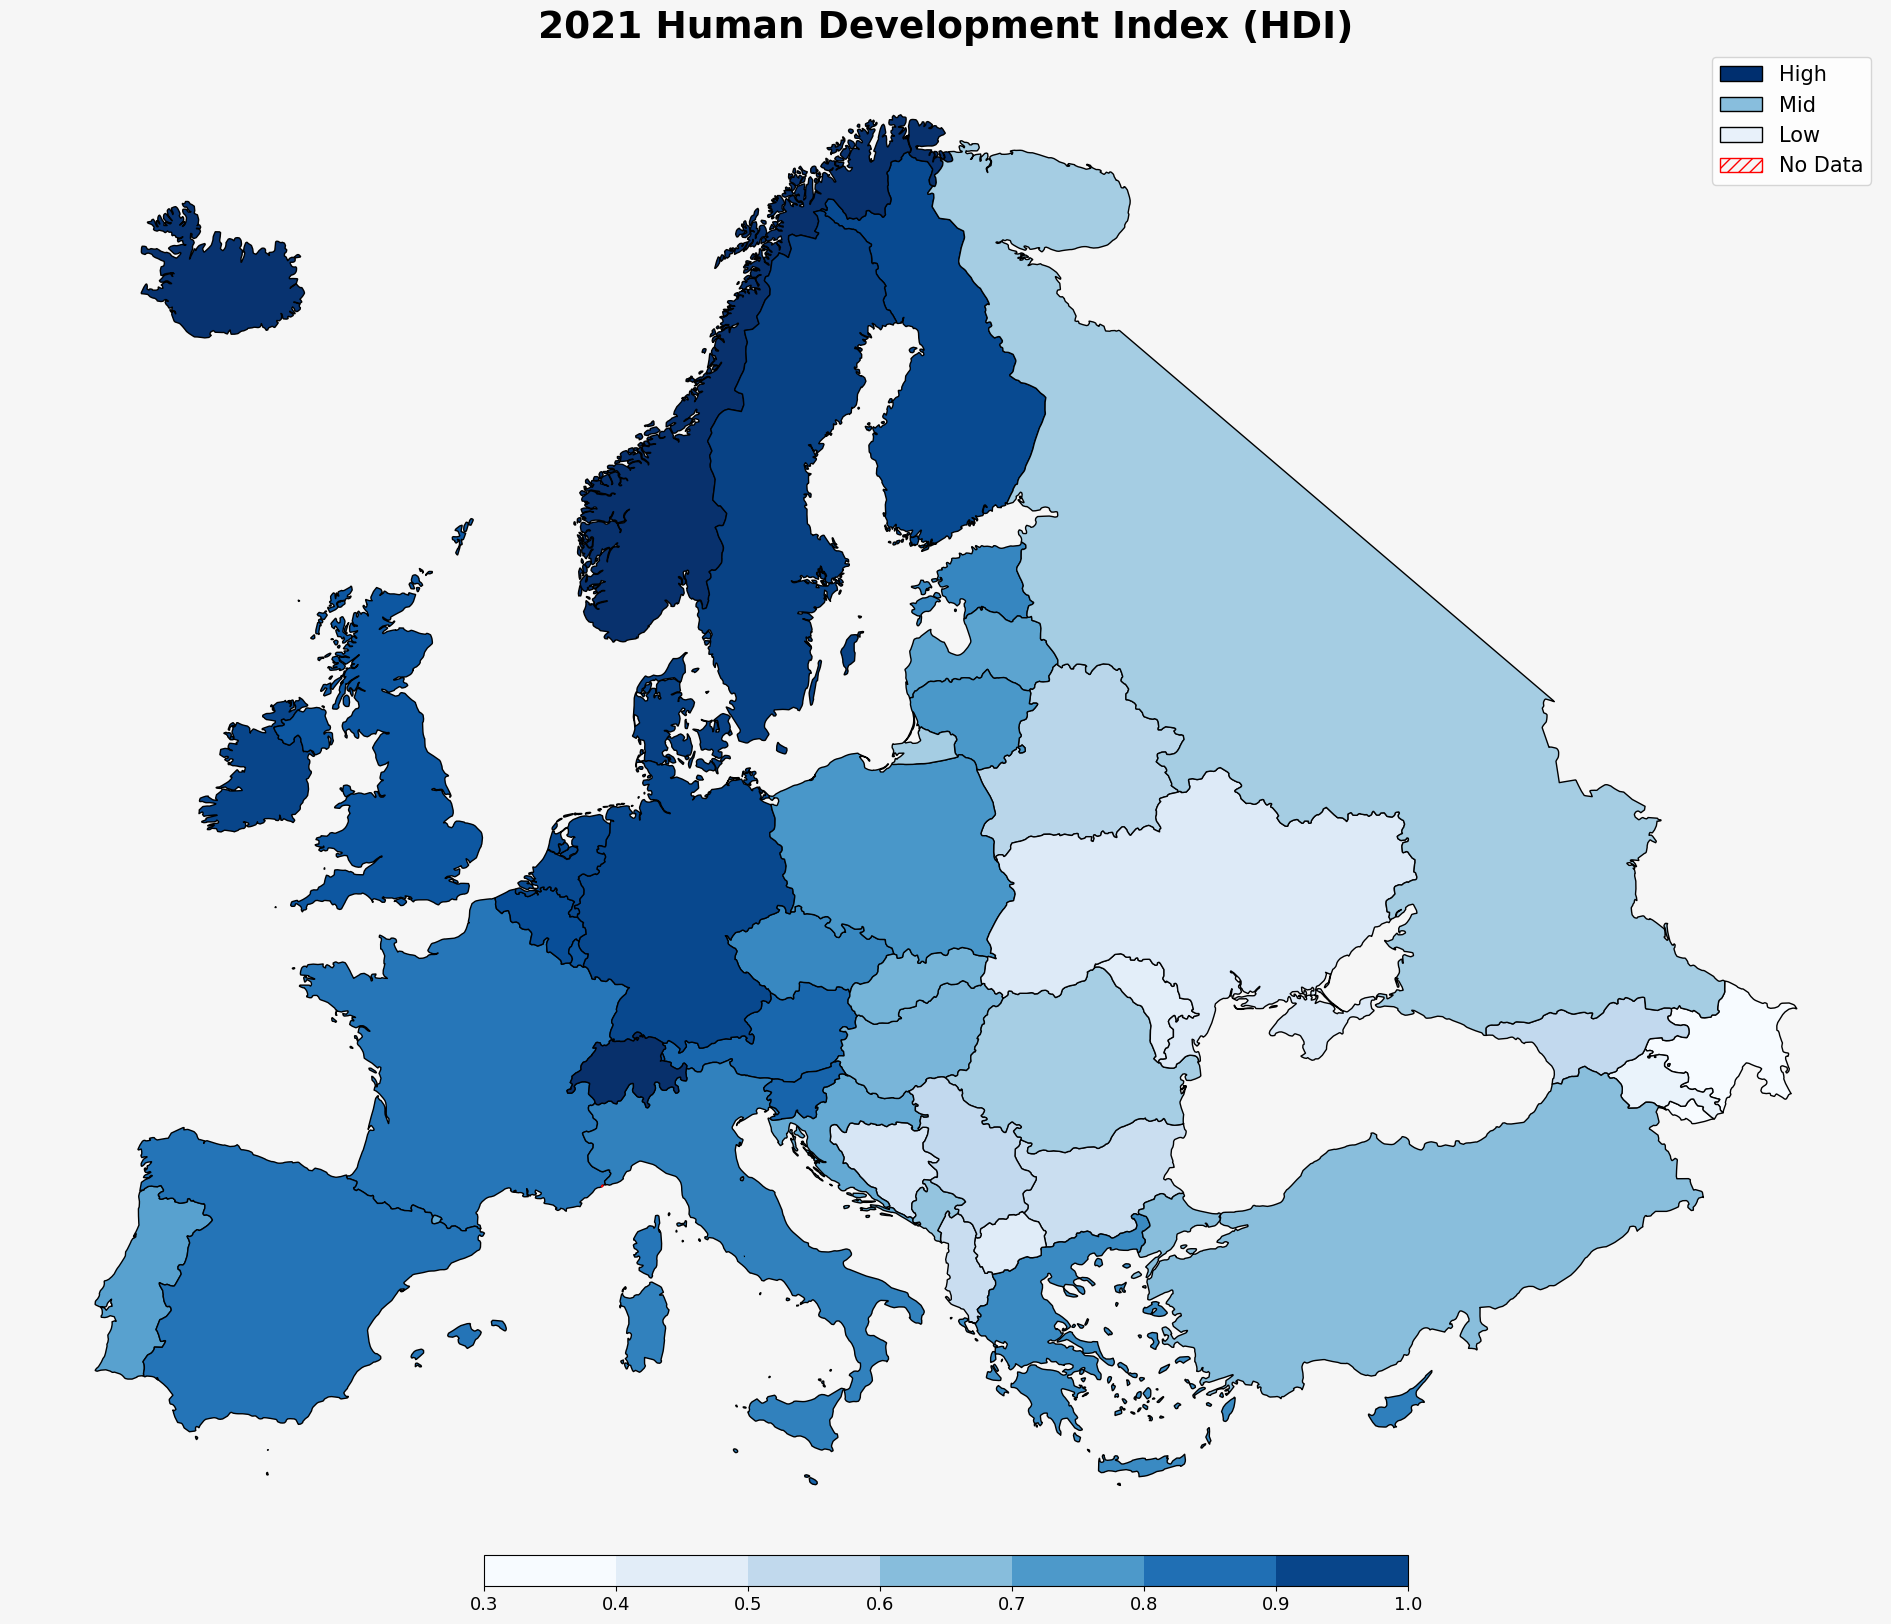

In [16]:
merged_df = merged_df.to_crs(epsg=3035)

vmin = df['hdi_2021'].min()
vmax = 1

bg_color = "#F6F6F6"

fig, ax = plt.subplots(1, 1, figsize=(25,20))


merged_df.plot(
    column='hdi_2021',
    ax=ax,
    edgecolor='black',
    cmap='Blues',
    missing_kwds={
        "color": bg_color,
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },               
)

ax.set_title('2021 Human Development Index (HDI)',
              fontdict={'fontsize': '27', 'fontweight': 'bold'})

ax.set_axis_off()

# scale map
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, fraction=0.02, aspect=30,pad=0.001, orientation="horizontal", location="bottom", boundaries=(0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0))
for t in cbar.ax.get_xticklabels():
    t.set_fontsize(13)

# bg color
fig.set_facecolor(bg_color)

# custom legend
none_color = mpatches.Patch(edgecolor='r', facecolor=bg_color, hatch='///', label='No Data')
high_color = mpatches.Patch(edgecolor='#000000', facecolor='#002f6f',label='High')
mid_color = mpatches.Patch(edgecolor='#000000', facecolor='#88bedd',label='Mid')
low_color = mpatches.Patch(edgecolor='#000000', facecolor='#e8f1fa',label='Low')
plt.legend(handles=[high_color,mid_color,low_color,none_color], prop={'size': 15})
plt.autoscale()

# plt.savefig("europe_hdi_2021.png", facecolor=fig.get_facecolor(), bbox_inches='tight')


In [17]:
country_data = [[country.name, country.alpha_2, country.alpha_3] for country in pycountry.countries]
pycountry_df = pd.DataFrame(country_data, columns=['name', 'alpha_2', 'alpha_3'])

top10_df = merged_df[['iso3','hdi_2021']].sort_values('hdi_2021', ascending=False).head(10)

top10_df = top10_df.merge(pycountry_df, left_on='iso3', right_on='alpha_3', how='inner')[['name','hdi_2021']]

top10_df = top10_df.reset_index().rename(columns={'name':'country', 'index':'#'})
top10_df['#'] = top10_df['#'] + 1
top10_df['hdi_2021'] = top10_df['hdi_2021'].round(3).apply(lambda x: '{:,.3f}'.format(x))


top10_df

,#,country,hdi_2021
0,1,Switzerland,0.962
1,2,Norway,0.961
2,3,Iceland,0.959
3,4,Denmark,0.948
4,5,Sweden,0.947
5,6,Ireland,0.945
6,7,Germany,0.942
7,8,Netherlands,0.941
8,9,Finland,0.940
9,10,Belgium,0.937
